In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("shopping_trends_updated.csv")
colors = ['black', 'green']

df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly


```
1. What is the impact of customer subscription status on their purchase behavior and the categories of items they prefer to buy? Are subscribed customers more likely to make larger purchases or have different preferences compared to non-subscribed customers?
```

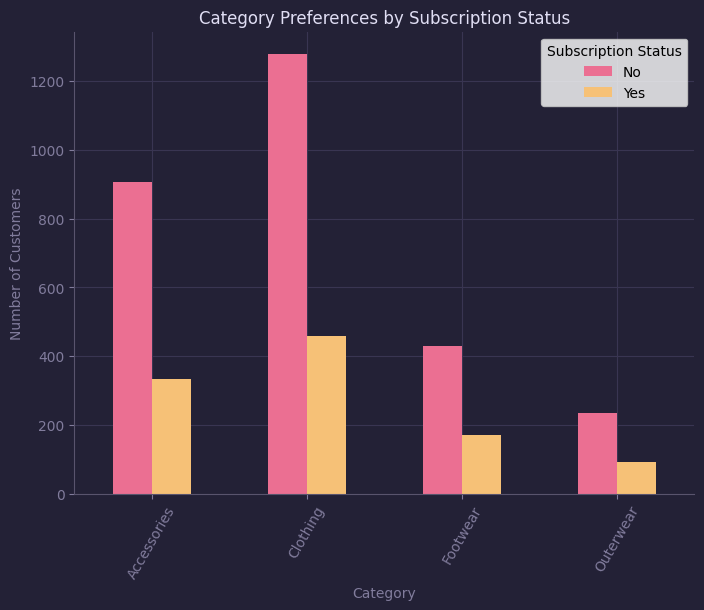

In [109]:
with plt.style.context("rose-pine-moon.mplstyle"):
    category = df.pivot_table(index='Category', columns='Subscription Status', values='Customer ID', aggfunc='count')
    category.plot(kind='bar', figsize=(8, 6), rot=60)

plt.xlabel('Category')
plt.ylabel('Number of Customers')
plt.title('Category Preferences by Subscription Status')
plt.legend(title='Subscription Status')
plt.show()


```The visual analysis of this bar graph reveals an interesting trend across various product categories. For Accessories, Clothing, Footwear, and Outerwear, the number of customers without a subscription consistently surpasses those with a subscription to this shopping market. This suggests a preference among non-subscribed customers for purchasing items in these four categories, as opposed to subscribed customers. The black bars indicate a substantial interest from non-subscribed customers, overshadowing the number of purchases made by subscribed customers. Overall, the data/graph implies that non-subscribed customers are more active in these categories within the shopping market compared to their subscribed counterparts.```



```
2. What are the most common payment methods used by customers within specific product categories, to better understand customer preferences and payment processing systems?
```

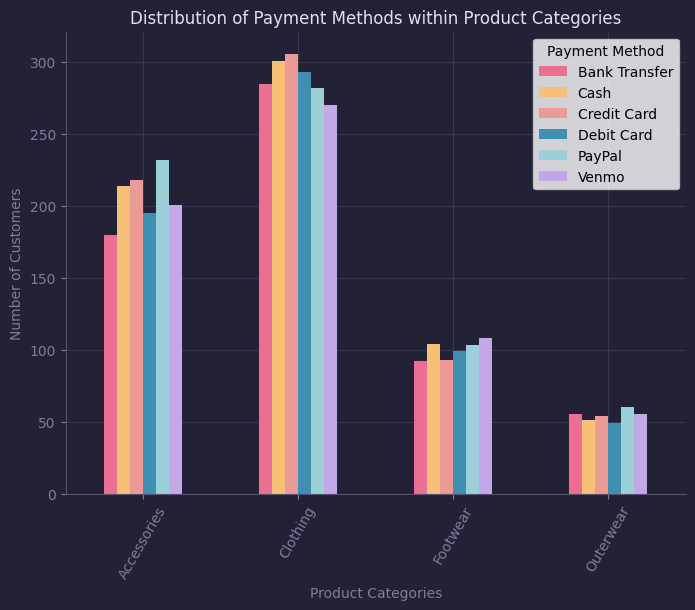

In [110]:
with plt.style.context("rose-pine-moon.mplstyle"):
    catpayments = df.groupby(['Category', 'Payment Method']).size().unstack()
    catpayments.plot(kind='bar', figsize=(8, 6), rot=60)

plt.xlabel('Product Categories')
plt.ylabel('Number of Customers')
plt.title('Distribution of Payment Methods within Product Categories')
plt.legend(title='Payment Method')
plt.show()



```
The visual analysis of the "Distribution of Payment Methods within Product Categories" bar graph reveals distinct patterns in customer payment preferences across different product categories. For Accessories and Footwear, Bank Transfer emerges as the most popular payment method, highlighting a preference for more traditional banking transactions. In contrast, Outerwear sees Credit Card as the predominant choice, indicating a potential inclination towards credit-based transactions within this category. The variation in rankings among Cash, Credit Card, and Venmo across categories suggests nuanced differences in customer behaviors. This information is valuable for businesses seeking to optimize their payment processing systems, as it underscores the importance of tailoring payment options to specific product categories in order to meet customer expectations and enhance overall satisfaction.
```

```3. What are the top product categories based on the number of purchases, and how do they compare in terms of popularity?```

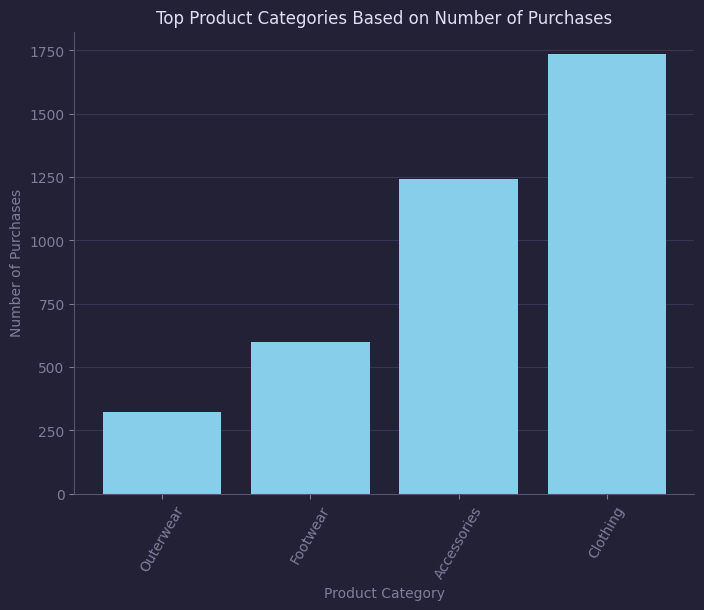

In [111]:
import pandas as pd
import matplotlib.pyplot as plt

df['Category'] = df['Category'].str.capitalize()

catpurchase = df['Category'].value_counts().reset_index()
catpurchase.columns = ['Category', 'Number of Purchases']
catpurchase = catpurchase.sort_values(by='Number of Purchases')

with plt.style.context("rose-pine-moon.mplstyle"):
    plt.figure(figsize=(8, 6))
    plt.bar(catpurchase['Category'], catpurchase['Number of Purchases'], color='skyblue')  
    plt.xlabel('Product Category')
    plt.ylabel('Number of Purchases')
    plt.title('Top Product Categories Based on Number of Purchases')
    plt.xticks(rotation=60)
    plt.show()


```
4. How does the average purchase amount vary across different product categories, and are there any notable trends or outliers that could inform pricing strategies or marketing approaches?
```

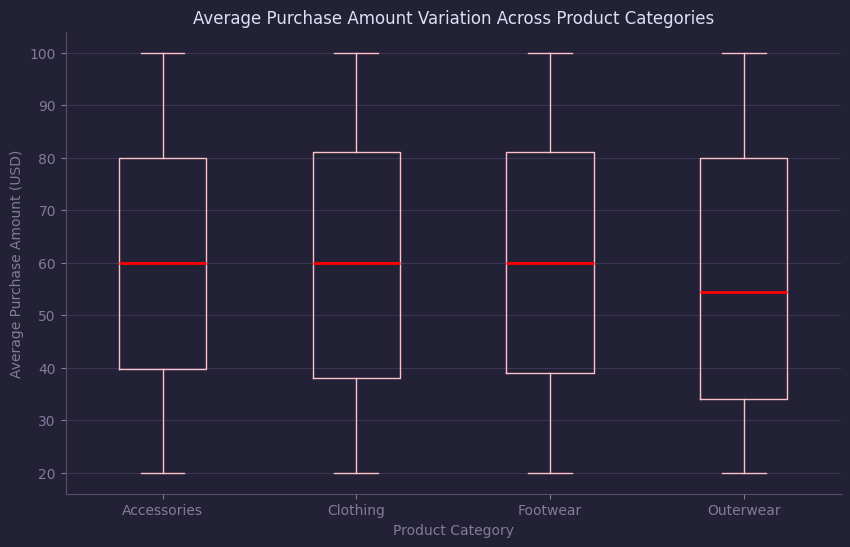

In [112]:
import pandas as pd
import matplotlib.pyplot as plt


with plt.style.context("rose-pine-moon.mplstyle"):
    avgpurchase = df.groupby('Category')['Purchase Amount (USD)'].mean()
    plt.figure(figsize=(10, 6))
    plt.xlabel('Product Category')
    plt.ylabel('Average Purchase Amount (USD)')
    plt.title('Average Purchase Amount Variation Across Product Categories')
    bp = plt.boxplot(df.groupby('Category')['Purchase Amount (USD)'].apply(list), labels=avgpurchase.index)
    for element in bp.keys():
        plt.setp(bp[element], color='pink', linewidth=1)
    for line in bp['medians']:
        line.set(color='red', linewidth=2)
    plt.show()


```The boxplot analysis of average purchase amounts across product categories uncovers notable trends. The median purchase amount, around $60.0, indicates a central spending tendency. While Accessories, Clothing, and Footwear share similar variability, Outerwear exhibits a slightly broader range. Notable outliers, especially in Outerwear, suggest occasional high or low-value transactions. The whiskers consistently reach a maximum of $100 and a minimum of $20 for all categories. This concise analysis informs businesses on optimizing pricing, marketing, and inventory strategies aligned with customer preferences```